# <font color=#023F7C> **Machine Learning, Explainability and Deep Learning** </font>

<font color=#023F7C>**Hi! PARIS DataBootcamp 2024 🚀**</font> <br>


<img src = https://www.hi-paris.fr/wp-content/uploads/2020/09/logo-hi-paris-retina.png width = "300" height = "200" >


**Name**: Linh Vu TU           <br>
**School**: École polytechnique         <br>
**Group number**: 29    <br>
**Track**: Intermediate

# **1. Important guidelines**


**<font size='5'><u>Goal of this practical session</u>**</font> <br>
Your goal is to build a Machine Learning model that can **predict whether a professional tennis player will win a match or not**. <br>

To achieve this goal, you were provided a dataset called `tennis_matches.csv` with 21 variables and around 28000 rows/players. <br>
The dataset contains some characteristics for each player (height, age, ranking, hand...) as well as match statistics (number of aces, who won the first set, ...). <br>
You have access to a pdf file called `dataset_tennis_prediction_DB2024.pdf` which contains a description of each variable.

The variable to predict is `won`, which is equal to 1 if the player won the match and 0 if the player didn't.

**<font size='5'><u>How to work on this notebook</u>**</font> <br>
The notebook is split in three parts: Machine Learning, Explainability and Deep Learning.

- **Beginner track**: You only have to complete the Machine Learning section.
- **Intermediate track**: Please complete Machine Learning and Explainability (Deep Learning is optional)

**<font size='5'><u>Bootcamp deliverables</u>**</font> <br>

Here are the two deadlines for the bootcamp deliverables:
- <u>**Friday 12:30 PM**</u>: <br> Send us the "Data visualisation" and "Machine Learning, Explainability and Deep Learning" notebooks (no need to send us data cleaning) <br>
    - **Each group member should send his own notebooks** (we won't accept one notebook per group)
    - Don't forget to complete the start of the notebook with your information (name, school, group number and track)
    
- <u>**Friday 2:30PM**</u>: <br>Send us the group slides <br>
    - You can send us a single powerpoint per group (no need to send us one per group member)
    - Don't forget to add your group number as well as who is in your group (name, school and track) to the slides

Send both the notebooks and the slides at `data-event@hi-paris.fr`

**<font size='5'><u>Need help ? 🙏</u>**</font> <br>

We will drop later in the week to the Machine Learning course (Beginner track) on HFactory the `Machine_Learning_Beginner_DB2024.ipynb` notebook for those who need help with the Machine Learning part.

**Don't hesitate to ask questions to the bootcamp organizers/staff members if you need help.**


# **2. Machine Learning**

Let's start by importing the libraries we used in two previous notebooks.

In [22]:
import pandas as pd
pd.set_option('display.max_columns', None) # Show all columns

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now load the `tennis_matches.csv` dataset using `pd.read_csv()`

In [23]:
path = r"./data/tennis_matches.csv"
matches = pd.read_csv(path)

### **2.1 Exploratory Data Analysis**



We will start by creating two lists with the continuous and categorical variables of our dataset. <br>
Note that we are not including `won` in both lists since we shouldn't apply data preprocessing to it

In [24]:
def variable_by_type(matches):
    # List of continuous variables
    continuous_var = list(matches.select_dtypes(include=[int, float]).columns)
    continuous_var.remove('won')
    # List of categorical variables
    categorical_var = list(matches.select_dtypes(include=['object']).columns)
    return continuous_var, categorical_var

continuous_var, categorical_var = variable_by_type(matches)
print(' '.join(continuous_var))
print(' '.join(categorical_var))

age ace df svpt 1stIn 1stWon 2ndWon SvGms bpSaved bpFaced rank rank_points draw_size tourney_date best_of minutes
hand surface tourney_level round


### Data preparation

Below are some global configuration variables for the notebook. I found out they do very little on the model accuracy.

In [25]:
# Drop the features that have almost zero correlation with the others and the target.
# This removes some noise in the dataset
DROP_IRRELEVANT_FEATURES = True

# Drop the features that have already another substitute within 90% correlation.
# This might avoid some overfitting and improve running time.
# We should be careful not to drop any more so the model accuracy is not impacted too much
DROP_HIGHLY_CORRELATED_FEATURES = True

# When using OneHotEncoder, set a minimum frequency threshold for categories
GROUP_INFREQUENT_CATEGORIES = False

# Use the categorical features for training.
# NOTE: we found out that they don't explain the model outputs a lot.
# Why not try discarding them altogether?
USE_CATEGORIES_FOR_TRAINING = True

# Reduce the feature dimension, keeping the model accuracy to an optimum
USE_DIMENSIONAL_REDUCTION = True

### Feature transformation

In [26]:
matches.describe()

,age,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,rank,rank_points,won,draw_size,tourney_date,best_of,minutes
count,27893.000000,27893.000000,27893.000000,27893.000000,27893.000000,27893.000000,27893.000000,27893.000000,27893.000000,27893.000000,27893.000000,27893.000000,27893.000000,27893.000000,27893.000000,27893.000000,27893.000000
mean,27.444144,6.309217,3.065321,81.154232,50.112107,35.712688,15.629369,12.674076,4.193059,6.924067,84.694153,1484.134478,0.466067,60.063672,2019.401606,3.398881,112.906105
std,4.658025,5.560199,2.470890,29.274646,19.216345,14.265530,6.936216,4.249050,3.273731,4.476780,127.627869,1693.921692,0.498856,41.682329,1.777724,0.799174,42.499048
min,16.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,2017.000000,3.000000,7.000000
25%,23.700000,2.000000,1.000000,59.000000,36.000000,26.000000,11.000000,10.000000,2.000000,4.000000,27.000000,629.000000,0.000000,32.000000,2018.000000,3.000000,81.000000
50%,27.300000,5.000000,3.000000,76.000000,47.000000,33.000000,15.000000,12.000000,4.000000,6.000000,56.000000,947.000000,0.000000,32.000000,2019.000000,3.000000,106.000000
75%,30.900000,9.000000,4.000000,98.000000,61.000000,44.000000,20.000000,15.000000,6.000000,10.000000,95.000000,1604.000000,1.000000,64.000000,2021.000000,3.000000,137.000000
max,42.500000,67.000000,26.000000,291.000000,218.000000,171.000000,56.000000,50.000000,27.000000,38.000000,2146.000000,12560.000000,1.000000,128.000000,2022.000000,5.000000,987.000000


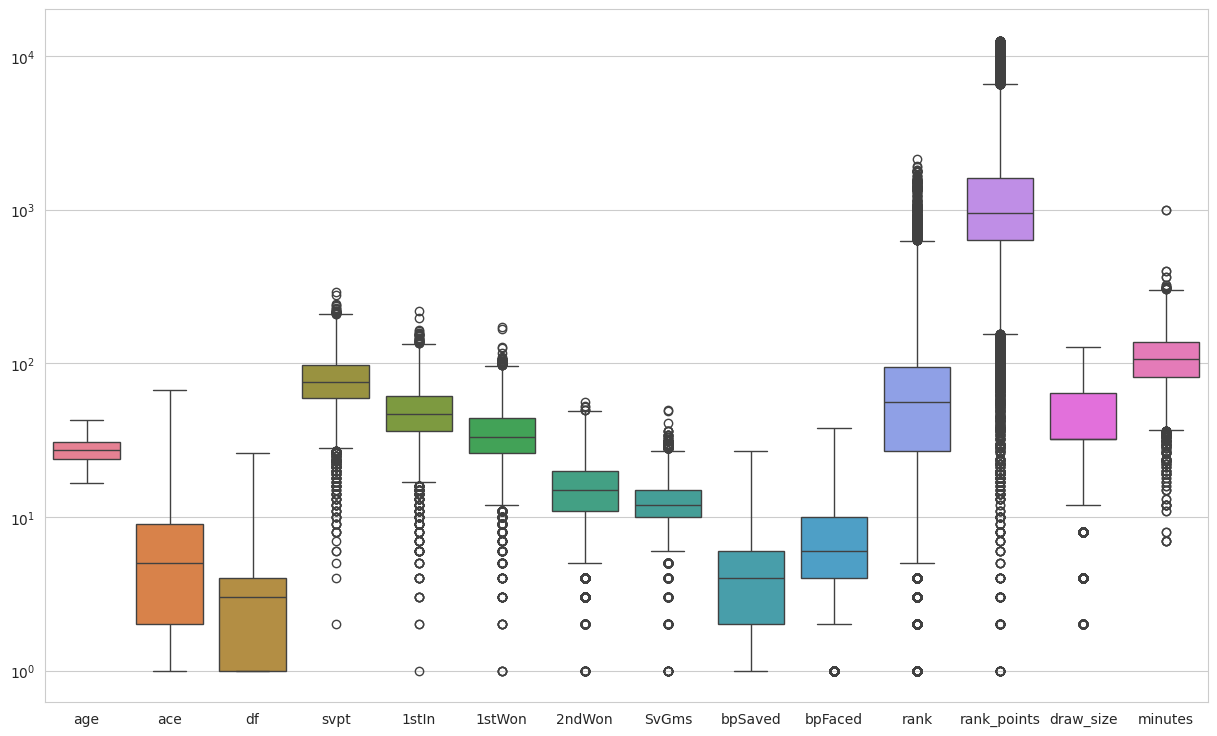

In [27]:
plt.figure(figsize=(15, 9))
sns.set_style('whitegrid')
sns.boxplot(matches.drop(columns=['won', 'best_of', 'tourney_date']), log_scale=True);

There are a few players in the dataset who played very few games, as we can see among the bottom outliers. We'll see later how much they influence the models.

We probably want to take the **logarithm** of the features with wide ranges such as `rank_points`, in order to have a model that can predict better for both new players and world champions.

There are some surprising extreme values. The shortest match in the dataset barely lasted 7 minutes, and the longest match lasted more than 16 hours! Seems like tie breaks are a must.

In [28]:
# Compute the log to make the rank feature easier to be linearly separated
matches['log_rank'] = np.log(matches['rank'])
matches['log_rank_points'] = np.log(matches['rank_points'])
matches.drop(columns=['rank', 'rank_points'], inplace=True)

# Recompute these lists since we just modified the columns
continuous_var, categorical_var = variable_by_type(matches)

**<u>Question 1:</u>** <br>
**Compute the correlation matrix of the continuous variables in the dataset with `.corr()`** <br>
**Then plot the heatmap of the correlation matrix using `sns.heatmap()`.**

**Did you notice any strongly correlated variables ?**

*<u>Help</u>: Use `annot=True` in `sns.heatmap()` to show the correlation coefficients.* <br>

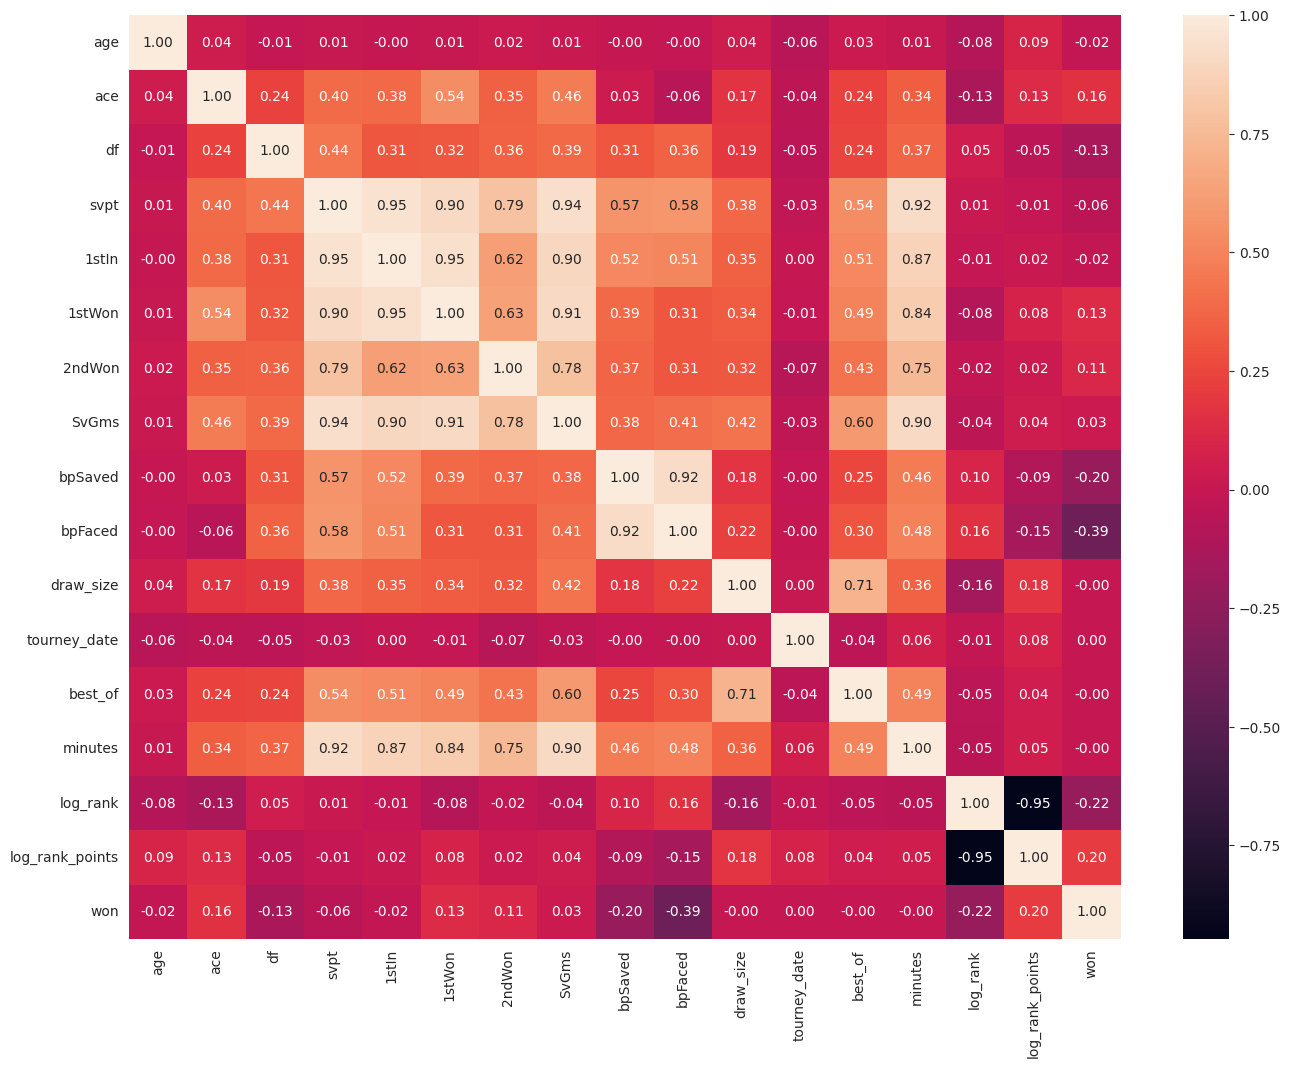

In [29]:

plt.figure(figsize=(16, 12))
corr_matrix = matches[continuous_var + ['won']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f');

The variable `log_rank` and `log_rank_points` are highly correlated since the `rank_points` is probably an Elo-like scale.

The variables `svpt`, `1stIn`, `1stWon`, `2ndWon`, `SvGms`, `bpSaved`, `bpFaced`, `df` and `minutes` have high correlations with one another. This is expected since they increase approximately linearly with the match duration (`minutes`).
The first five of them are related to player's performance, so they have significantly higher correlations with one another.
There also seems to be a moderately high correlation between `draw_size` and `best_of`, which means that the rules of the tournament are influenced by the number of participants.

The variables with highest (negative) correlation with `won` are `bpFaced` and `bpSaved`, `rank_points`, `ace`, `df`, `rank`, `1stWon` and `2ndWon`.
The variables `age` and `tourney_date` have almost no correlation with all of the other variables, including `won`.

It is possible to remove mutually highly collinear variables, but it should be done with moderation in order not to hurt model accuracy. Also, we want to keep relevant variables for model explanability later on.

In [30]:
if DROP_HIGHLY_CORRELATED_FEATURES:
    matches.drop(columns=['1stIn', 'SvGms', 'log_rank_points', 'minutes'], inplace=True)

if DROP_IRRELEVANT_FEATURES:
    matches.drop(columns=['age', 'tourney_date'], inplace=True)

We need to rebuild the list of continuous variables.

In [31]:
continuous_var, _ = variable_by_type(matches)

### Quick data integrity check

In [32]:
matches

,hand,ace,df,svpt,1stWon,2ndWon,bpSaved,bpFaced,won,surface,draw_size,tourney_level,best_of,round,log_rank
0,R,10.0,9.0,104.0,41.0,24.0,6.0,10.0,0,Hard,128,G,5,R64,5.147494
1,R,3.0,7.0,109.0,40.0,20.0,9.0,12.0,0,Grass,32,A,3,R16,3.988984
2,R,7.0,4.0,97.0,43.0,17.0,8.0,11.0,0,Hard,32,A,3,SF,2.302585
3,R,5.0,4.0,91.0,40.0,13.0,1.0,6.0,0,Clay,32,A,3,QF,3.610918
4,L,3.0,11.0,104.0,50.0,18.0,3.0,5.0,1,Hard,128,G,5,R16,2.639057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27888,R,1.0,2.0,55.0,18.0,13.0,7.0,10.0,0,Hard,128,M,3,R32,3.931826
27889,R,2.0,1.0,36.0,14.0,15.0,0.0,0.0,1,Hard,32,A,3,R32,3.135494
27890,L,3.0,2.0,56.0,28.0,10.0,0.0,1.0,1,Hard,32,A,3,R16,5.361292
27891,R,2.0,1.0,63.0,31.0,7.0,4.0,7.0,0,Hard,32,A,3,R32,5.170484


In [33]:
matches.isna().sum().sum()

0

Dataset has no missing values!

In [34]:
matches[categorical_var].nunique()

hand             3
surface          4
tourney_level    5
round            8
dtype: int64

We may investigate to what extent are categorical variables balanced.

**<u>Question 2:</u>** <br>
**Create a plot that shows the frequency of each target class (0 and 1) in the dataset using `sns.barplot`** <br>
**Are both classes in the same proportion in the dataset ?**

*Help: Build a dataframe by applying `.value_counts()` to the `won` variable, then use it to make a plot.*

In [35]:
won_frequencies = matches['won'].value_counts().to_frame()
won_frequencies['result'] = ['Lost', 'Won']
won_frequencies

,count,result
won,,
0,14893,Lost
1,13000,Won


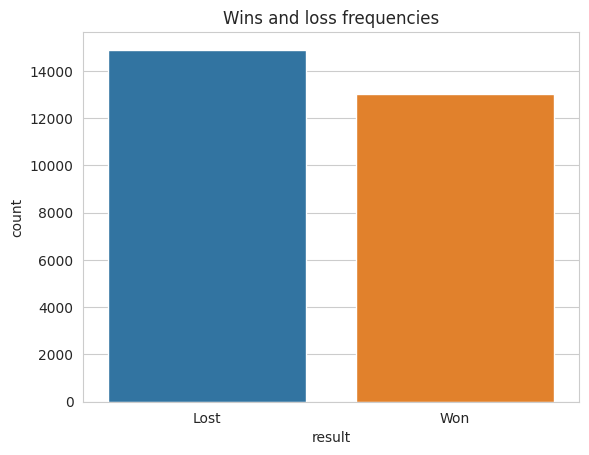

In [36]:
sns.barplot(won_frequencies, x='result', y='count', hue='result', legend=None);
plt.title('Wins and loss frequencies');


The target classes are balanced.

**You can create more plots/explore the data further if you wish to do so !**

### Quick correlation check

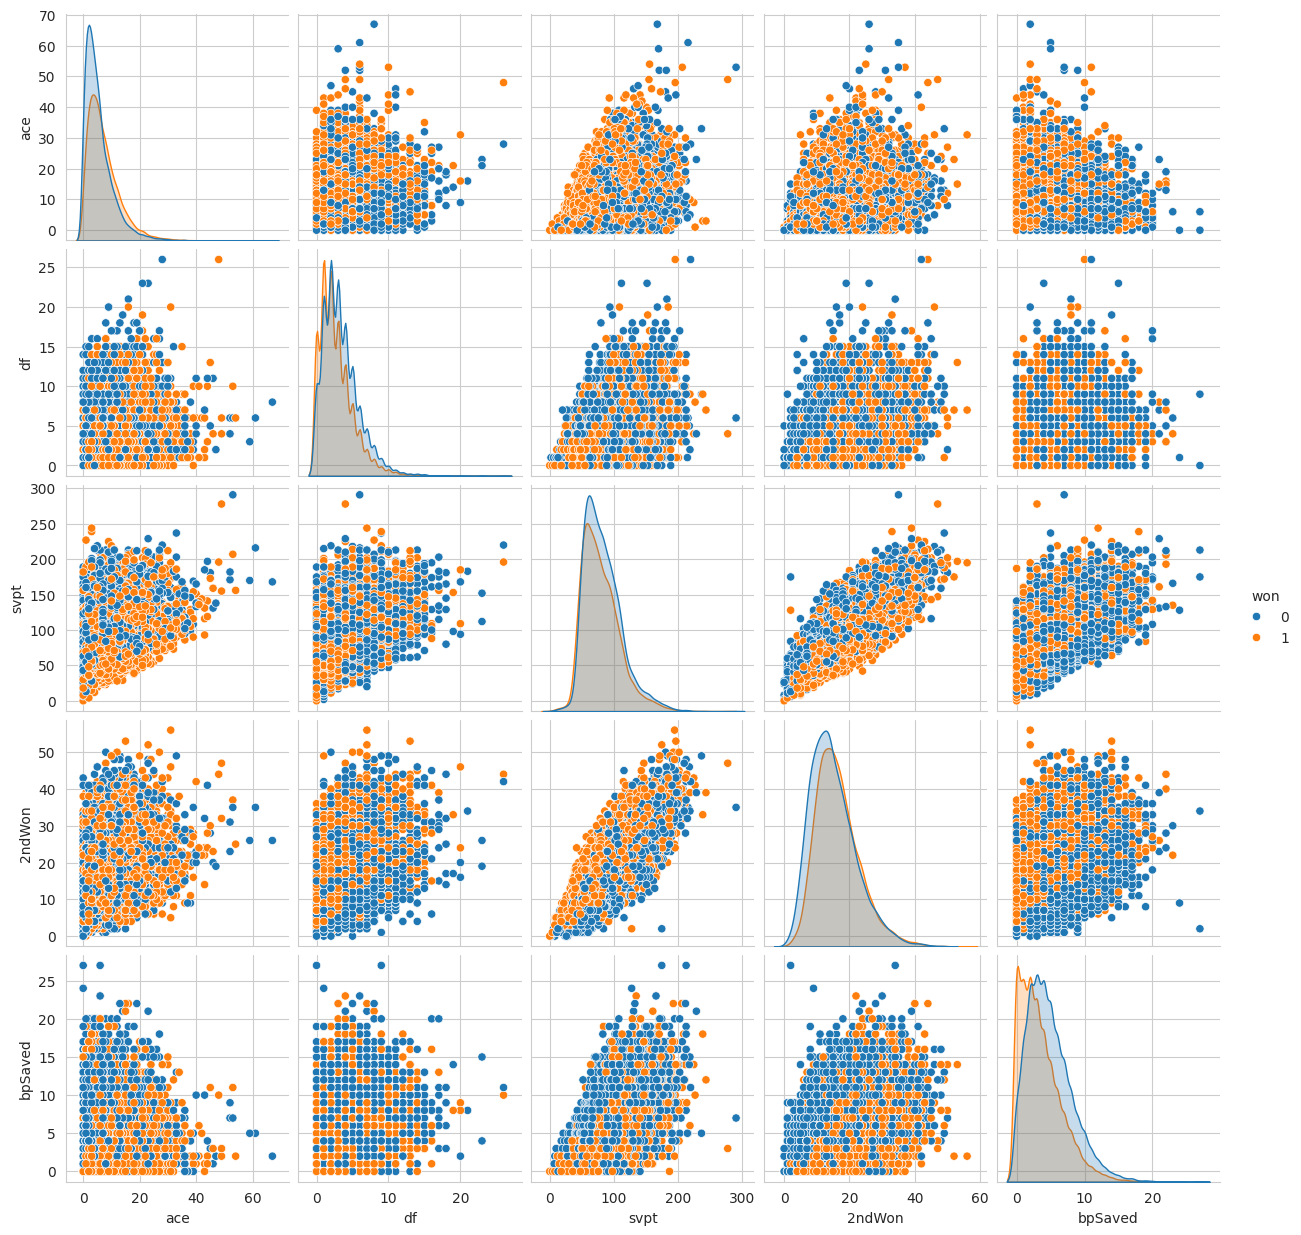

In [37]:
# NOTE: some correlated variables are not included in order to avoid getting redundant information.
# WARNING: this may take a couple of minutes to render.
match_time_increasing = ['ace', 'df', 'svpt', '2ndWon', 'bpSaved', 'won']
sns.pairplot(matches[match_time_increasing], hue='won');

As we can see from these plots, all of these variables can help the prediction of the match outcome by roughly separating the target features.

### Influence of rank on match outcome

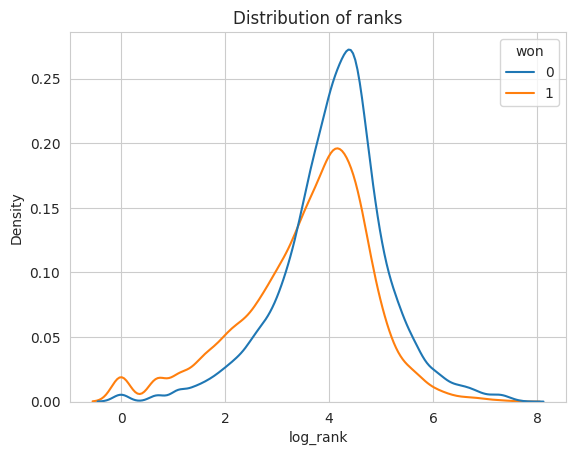

In [38]:
sns.kdeplot(matches, x='log_rank', hue='won')
plt.title('Distribution of ranks');

The rank distribution of winners is slightly shifted to the left, which confirms the obvious theory that high-rank players win more often than lower ranked players.

### Categorical variables

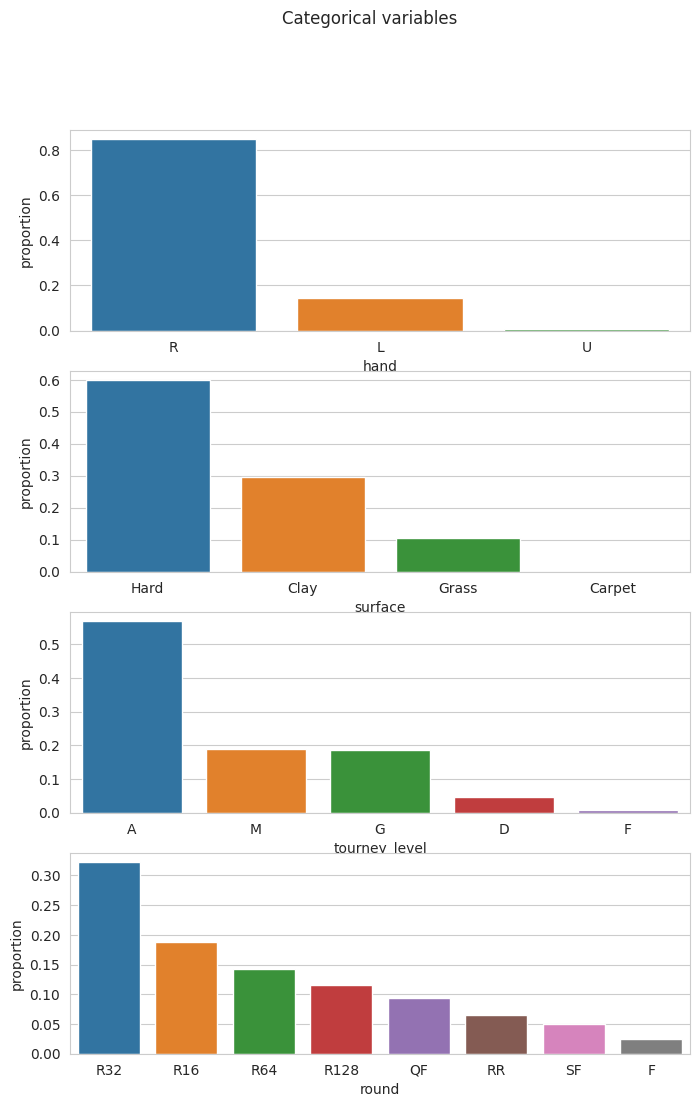

In [39]:
fig, axs = plt.subplots(len(categorical_var), 1, figsize=(8, 3*len(categorical_var)))
for (ax, var) in zip(axs, categorical_var):
    counts = matches[var].value_counts(normalize=True).to_frame().reset_index()
    sns.barplot(counts, x=var, y='proportion', ax=ax, hue=var)
plt.suptitle('Categorical variables');

**Data interpretation:**

Players should be trained on all three surfaces, although they are more likely to play on hard ground or clay.

As we can see, there are a few unusual categories, such as hand `U` and surface `carpet`. We may put them under an unfrequent category during training.

If our goal is to make the model perform well on final matches, for instance, we may want to make some categories artifically more balanced. I wrote a function on how to do that below, but I won't be using it in this notebook.

In [40]:
def make_balanced(matches, on_categories=categorical_var):
    # Remove rows with very rare categories that can't be balanced anyway
    matches = matches[
        (matches['hand'] != 'U')
        & (matches['surface'] != 'carpet')
        & (matches['tourney_level'] != 'F')
    ]
    # Shuffle the dataset and resample on the specified categories
    return matches.sample(frac=1).groupby(on_categories).head(100)

to_balance = ['hand', 'round']
# Example on how to get a balanced dataset based on hand and round
make_balanced(matches, on_categories=to_balance)[to_balance].value_counts().to_frame().reset_index()

,hand,round,count
0,L,QF,100
1,L,R128,100
2,L,R16,100
3,L,R32,100
4,L,R64,100
5,L,RR,100
6,L,SF,100
7,R,F,100
8,R,QF,100
9,R,R128,100


### Are left-handed players that strong?

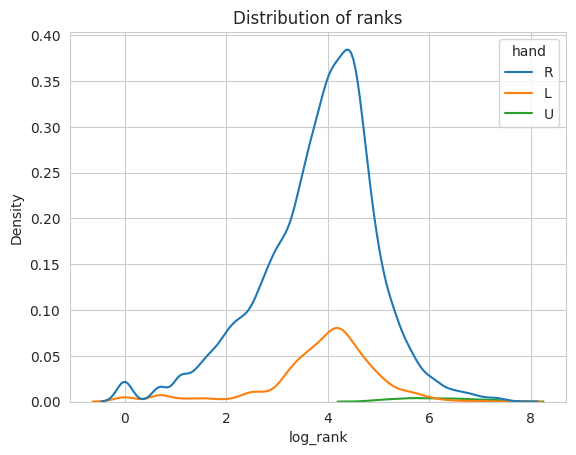

In [41]:
sns.kdeplot(matches, x='log_rank', hue='hand')
plt.title('Distribution of ranks');

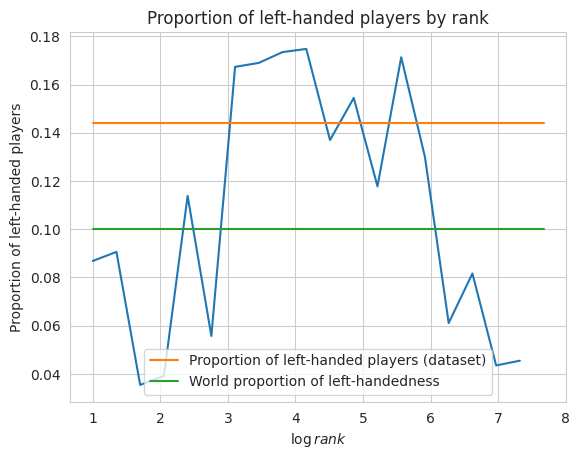

In [42]:
tennis_left = matches['hand'].value_counts(normalize=True)['L']
world_left = 0.1

log_rank = np.linspace(1, matches['log_rank'].max(), 20)
hist_l, edges_l = np.histogram(matches['log_rank'][matches['hand'] == 'L'], bins=log_rank)
hist_r, edges_r = np.histogram(matches['log_rank'][matches['hand'] == 'R'], bins=log_rank)
plt.plot(log_rank[:-1], hist_l / (hist_l + hist_r))
plt.plot(
    [log_rank[0], log_rank[-1]], [tennis_left, tennis_left],
    label='Proportion of left-handed players (dataset)'
)
plt.plot(
    [log_rank[0], log_rank[-1]], [world_left, world_left],
    label='World proportion of left-handedness'
)
plt.grid(True)
plt.xlabel(r'$\log{rank}$')
plt.ylabel('Proportion of left-handed players')
plt.legend()
plt.title('Proportion of left-handed players by rank');

There are more left-handed players in tennis, but contrary to popular belief, it is not clear that among serious players, left-handed players are stronger. There are not that many left-handed players in the top 100.

Let's show that the categorical variables have an impact on the game outcome. We can plot some bar plots of the continuous variables with the highest correlations with `win`.

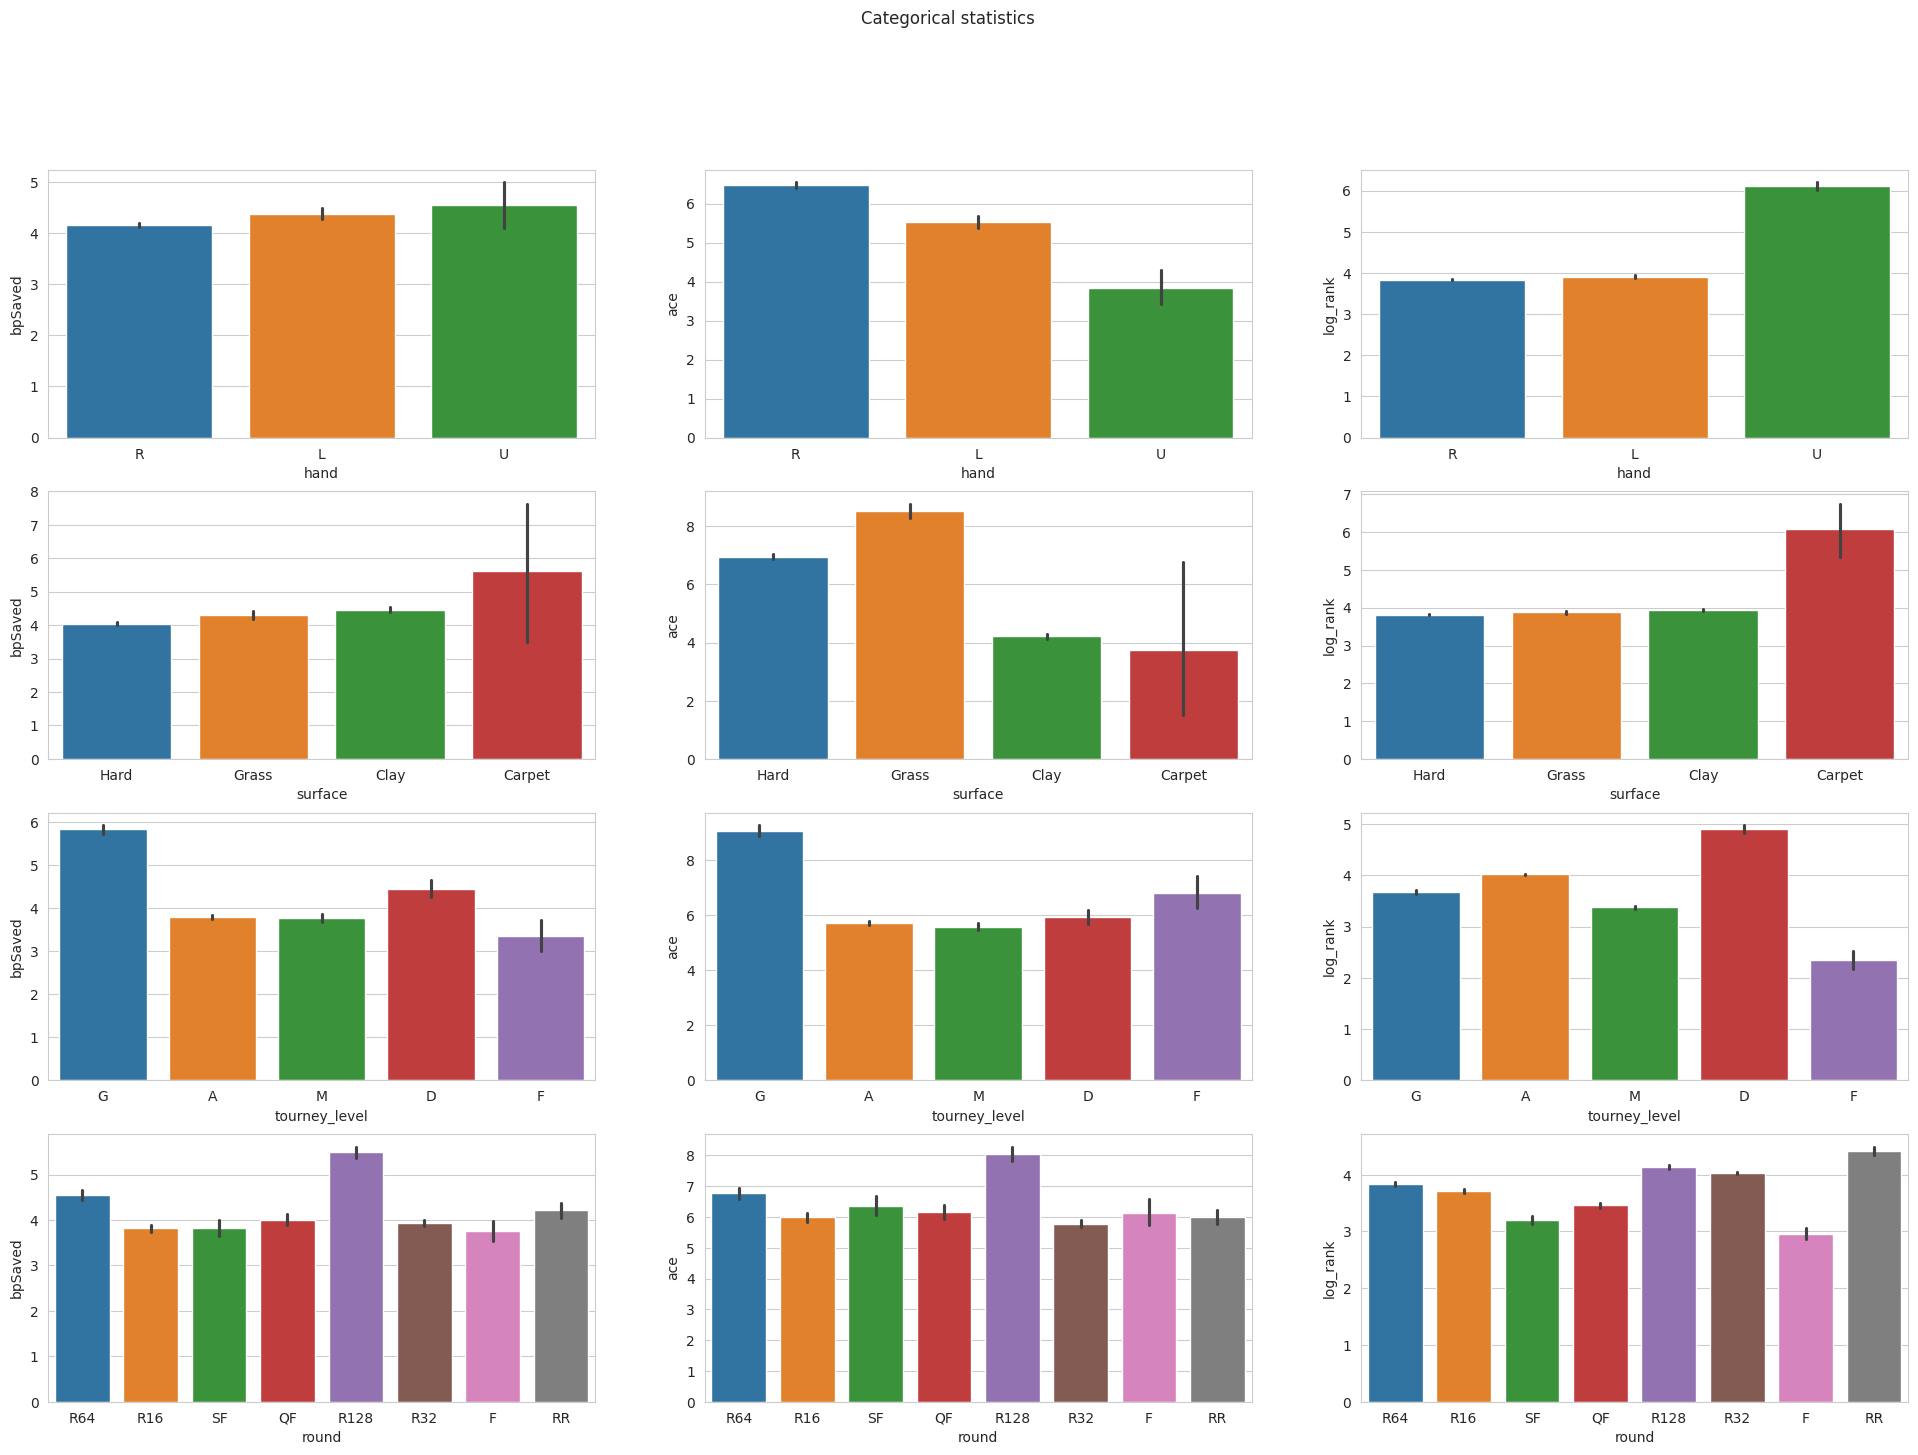

In [43]:
selected_continous = ['bpSaved', 'ace', 'log_rank']
nx = len(selected_continous)
ny = len(categorical_var)
fig, ax_xy = plt.subplots(ny, nx, figsize=(8*nx, 4*ny))
for (ax_x, var_cat) in zip(ax_xy, categorical_var):
    for (ax, var_cont) in zip(ax_x, selected_continous):
        sns.barplot(matches, x=var_cat, y=var_cont, hue=var_cat, ax=ax)
plt.suptitle('Categorical statistics');

**Interesting facts from these bar plots:**
- Matches from G-level tournaments have much more aces and breakpoints saved
- Aces are much more likely on grass and on hard surfaces than on clay

### **2.2 Data preprocessing**

In [44]:
# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler


**<u>Question 3:</u>** <br>**Split the dataset into a train and test set with `train_test_split`** <br>
- Don't forget to first seperate the feature variables (X) and the target variable (y)
- Use `stratify=y` to make sure each split has the same proportion of target classes.

*Help: The target variable is the variable you wish to predict*


In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    matches.drop(columns=['won']), matches['won'],
    test_size=0.2, random_state=42, stratify=matches['won']
)

In [46]:
X_train.shape, X_test.shape

((22314, 14), (5579, 14))

**<u>Question 4:</u>** <br>**Transform the categorical variables in each split with `OneHotEncoder`.** <br>
**Then, build a dataframe with the onehotencoded variables and their corresponding variables names <u>for each split.</u>** <br>

The column names OneHotEncoder creates can be accessed with `.get_feature_names_out()`. <br>
Go this [page](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) for more info on how to use scikit-learn's `OneHotEncoder` function. <br>

*Don't forget, data preprocessing is only applied to the feature variables in the case of binary classification !*


In [47]:
min_freq = 0.1 if GROUP_INFREQUENT_CATEGORIES else 1e-16
enc = OneHotEncoder(min_frequency=min_freq)

enc.fit(X_train[categorical_var])

OneHotEncoder(min_frequency=1e-16)

In [48]:
cat_names = enc.get_feature_names_out()
X_train_cat = pd.DataFrame(
    enc.transform(X_train[categorical_var]).toarray(),
    columns=cat_names, dtype=int
)
X_test_cat = pd.DataFrame(
    enc.transform(X_test[categorical_var]).toarray(),
    columns=cat_names, dtype=int
)

In [49]:
# N.B: the fact that X_train_cat and X_test_cat have the same shape
# as X_train and X_test is a coincidence
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22314 entries, 0 to 22313
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   hand_L           22314 non-null  int64
 1   hand_R           22314 non-null  int64
 2   hand_U           22314 non-null  int64
 3   surface_Carpet   22314 non-null  int64
 4   surface_Clay     22314 non-null  int64
 5   surface_Grass    22314 non-null  int64
 6   surface_Hard     22314 non-null  int64
 7   tourney_level_A  22314 non-null  int64
 8   tourney_level_D  22314 non-null  int64
 9   tourney_level_F  22314 non-null  int64
 10  tourney_level_G  22314 non-null  int64
 11  tourney_level_M  22314 non-null  int64
 12  round_F          22314 non-null  int64
 13  round_QF         22314 non-null  int64
 14  round_R128       22314 non-null  int64
 15  round_R16        22314 non-null  int64
 16  round_R32        22314 non-null  int64
 17  round_R64        22314 non-null  int64
 18  round_

**<u>Question 5</u>**: <br>
**Scale the continuous variables using either `StandardScaler` (standardization) or `MinMaxScaler` (normalization) for each split.**<br>
**Then, build a dataframe with the scaled variables and their corresponding variables names for each split.** <br>




In [50]:
scaler = StandardScaler()
scaler.fit(X_train[continuous_var])

StandardScaler()

In [51]:
X_train_cont = pd.DataFrame(
    scaler.transform(X_train[continuous_var]),
    columns=continuous_var
)
X_test_cont = pd.DataFrame(
    scaler.transform(X_test[continuous_var]),
    columns=continuous_var
)

In [52]:
X_train_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22314 entries, 0 to 22313
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ace        22314 non-null  float64
 1   df         22314 non-null  float64
 2   svpt       22314 non-null  float64
 3   1stWon     22314 non-null  float64
 4   2ndWon     22314 non-null  float64
 5   bpSaved    22314 non-null  float64
 6   bpFaced    22314 non-null  float64
 7   draw_size  22314 non-null  float64
 8   best_of    22314 non-null  float64
 9   log_rank   22314 non-null  float64
dtypes: float64(10)
memory usage: 1.7 MB


<u>**Question 6**</u>: <br>
**Merge the dataframes with the onehotencoded variable and the scaled variables for each split.<br>**
To merge two dataframes together, use `pd.concat([dataframe1, dataframe2],axis=1)`

In [53]:
if USE_CATEGORIES_FOR_TRAINING:
    X_train_enc = pd.concat([X_train_cat, X_train_cont], axis=1)
    X_test_enc = pd.concat([X_test_cat, X_test_cont], axis=1)
else:
    X_train_enc = X_train_cont
    X_test_enc = X_test_cont
X_train_enc.shape

(22314, 30)

### **2.3 Model training and evaluation**
Now that our dataset has been preprocessed, we can use it train Machine Learning models.





In [54]:
# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC # Support Vector Machine for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

In [55]:
# Performance metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_auc_score, classification_report

<u>**Question 7**:</u> <br>
**Train three models of your choice** (Logistic Regression, K nearest neighbor, Decision Tree,...) **using scikit-learn's `.fit()` method. <br>**

*<u>Help</u>: Train these models on the training set (`X_train` and `y_train`).* <br>

## Dimensionality reduction

Here we want a way to **visualize** our transformed data in order to understand its distribution.
We shall do that by projecting the features on the three axes with (roughly) highest variance.

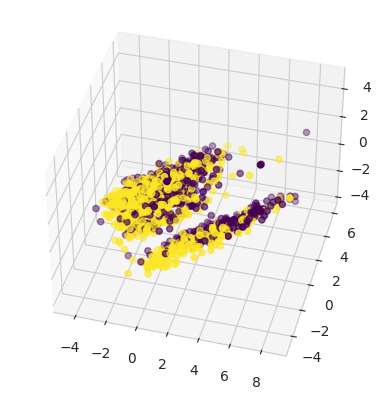

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
projected = pca.fit_transform(X_train_enc)
projected = projected[::10]
color = y_train[::10]

# For interactive figure
#%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projected[:,0], projected[:,1], projected[:,2], c=color, cmap='viridis')
ax.view_init(elev=40, azim=-75)

If we play with the interactive 3D plot, it becomes clear that the data is almost linearly separable. We can guess that classifiers based on SVM or logistic regression should have good performance.

We may also reduce the number of dimensions of our data in order to **improve performance**.

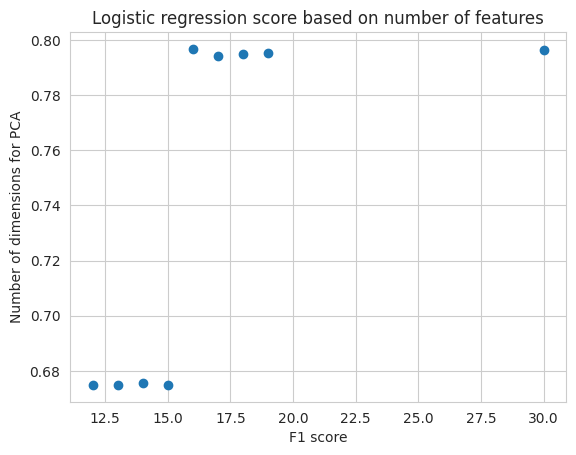

Cutoff dimension: 16


In [57]:
%matplotlib inline

# Include the maximum dimension to compare with the no PCA baseline
if USE_CATEGORIES_FOR_TRAINING:
    dimensions = np.array(list(range(12, 20)) + [X_train_enc.shape[1]], dtype=np.int64)
else:
    dimensions = np.arange(3, X_train_enc.shape[1] + 1, dtype=np.int64)
scores = np.zeros(dimensions.shape)

for (i, dim) in enumerate(dimensions):
    pca = PCA(n_components=dim)
    X_train_projected = pca.fit_transform(X_train_enc)
    X_test_projected = pca.transform(X_test_enc)

    log_reg_clf = LogisticRegression(random_state=42)
    log_reg_clf.fit(X_train_projected, y_train)
    predicted = log_reg_clf.predict(X_test_projected)
    scores[i] = f1_score(y_test, predicted)

plt.scatter(dimensions, scores)
plt.xlabel('F1 score')
plt.ylabel('Number of dimensions for PCA')
plt.title('Logistic regression score based on number of features')
plt.show()

cutoff_dim = dimensions[np.argwhere(scores >= 0.75)[0][0]]
print('Cutoff dimension:', cutoff_dim)

The F1 score jumps from $0.7$ to $0.8$ with $16$ dimensions when including categorical variables, and $9$ dimensions without including them. Seems like this is the minimal dimension to get good scores.

In [58]:
n_components = cutoff_dim

if USE_DIMENSIONAL_REDUCTION:
    pca = PCA(n_components=dim)
    X_train_projected = pca.fit_transform(X_train_enc)
    X_test_projected = pca.transform(X_test_enc)
else:
    X_train_projected = X_train_enc
    X_test_projected = X_test_enc

In [59]:
log_reg_clf = LogisticRegression(random_state=42)
log_reg_clf.fit(X_train_projected, y_train)

LogisticRegression(random_state=42)

In [60]:
rand_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=6)
rand_forest_clf.fit(X_train_projected, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [61]:
tree_clf = DecisionTreeClassifier(random_state=42)
ada_tree_clf = AdaBoostClassifier(
    tree_clf,
    n_estimators=50, learning_rate=1.0, algorithm='SAMME',
    random_state=42
)
ada_tree_clf.fit(X_train_projected, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(random_state=42),
                   random_state=42)

**<u>Question 8**</u>: <br>
**Predict labels for the test set with the three previous models with `.predict()`** <br>
**Then for each model, compute the `accuracy_score` and the `f1_score` using the predicted values and `y_test` (the true values).**

*<u>Help</u>: The `.predict()` function should be used on the feature of the test set (`X_test`)*. <br>

In [62]:

classifier_names = ['LogisticRegression', 'RandomForest','AdaBoostDecisionTree']
classifiers = [log_reg_clf, rand_forest_clf, ada_tree_clf]


In [63]:
predictions = [clf.predict(X_test_projected) for clf in classifiers]

In [64]:
scores = [(accuracy_score(y_test, pred), f1_score(y_test, pred)) for pred in predictions]

In [65]:
for (name, (acc, f1)) in zip(classifier_names, scores):
    print(f'--> {name}')
    print(f'\tAccuracy score: {acc:.2f}\tF1 score: {f1:.2f}\n')

--> LogisticRegression
	Accuracy score: 0.81	F1 score: 0.80

--> RandomForest
	Accuracy score: 0.80	F1 score: 0.77

--> AdaBoostDecisionTree
	Accuracy score: 0.73	F1 score: 0.71



**Logistic regression** performs the best! Seems like more complexity is not necessarily better... Of course, we cannot draw definitive conclusions without hyperparameter tuning.

80% of the outcomes can be predicted by the model. This result seems reasonably good, as tennis matches have a high degree of unpredictability and the outcome depends on the opponent. A pairwise comparison-based model would likely be more accurate.

**<u>Question 9**:</u> <br>
**Compute the confusion matrix of the model with the best f1 score and display it using `ConfusionMatrixDisplay()`.**


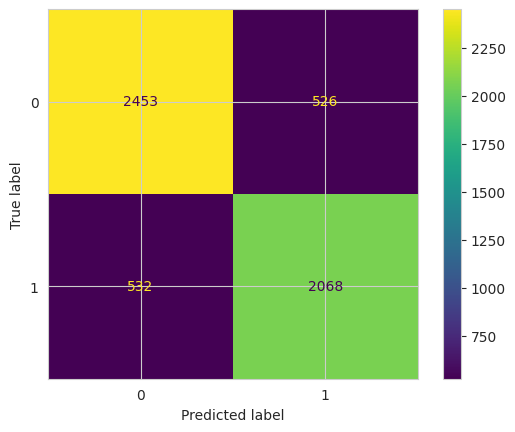

In [66]:
best_model_index = classifier_names.index('LogisticRegression')

ConfusionMatrixDisplay.from_predictions(
    y_test, predictions[best_model_index],
)

In [67]:
print(classification_report(y_test, predictions[best_model_index]))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2979
           1       0.80      0.80      0.80      2600

    accuracy                           0.81      5579
   macro avg       0.81      0.81      0.81      5579
weighted avg       0.81      0.81      0.81      5579



**You can compute other metrics (Precision, Recall, AUC, ...) or create more plots (ROC_AUC, Precision/Recall curve, ...) if you want to.**

### **2.4 Improve the performance of your models (Bonus)**

In [68]:
# Improve your model
from sklearn.model_selection import GridSearchCV

<u>**Question 10 (Bonus)**</u> <br>
**Try `GridSearchCV` on at least one of the models you tested, to find more optimal hyperparameters** (in terms of f1 score) <br>
**Get the best hyperparameters found by gridsearch (`.best_params_`), as well the best f1 score (`.best_score_`)**

*Note: The optimal parameters are those who improve the f1 score of the model*
- *Use the `scoring='f1'` in `GridSearchCV` to use the F1 score as the metric*
- *Implementing these methods can be very heavy in terms of computing resources, don't select to many hyperparameters to test*
- *Try setting `cv` to 3 to reduce the running time of your code*

In [69]:
grid_search_logit = GridSearchCV(
    LogisticRegression(random_state=42, C=10, tol=1e-3, solver='saga'),
    {
        'penalty': ['l1', 'l2'],
        'C': [1, 3, 10, 30, 100],
        'tol': [1e-4, 5e-4, 1e-3]
    },
    scoring='f1',
)
grid_search_logit.fit(X_train_projected[:2000], y_train[:2000])
print(
    f'Best parameters for LogisticRegression: {grid_search_logit.best_params_}\n'
    f'Best F1-score: {grid_search_logit.best_score_}'
)

/home/lvt/.local/share/virtualenvs/ml-TQx6uCZG/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/lvt/.local/share/virtualenvs/ml-TQx6uCZG/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/lvt/.local/share/virtualenvs/ml-TQx6uCZG/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/lvt/.local/share/virtualenvs/ml-TQx6uCZG/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/lvt/.local/share/virtualenvs/ml-TQx6uCZG/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached w

Best parameters for LogisticRegression: {'C': 1, 'penalty': 'l2', 'tol': 0.0001}
Best F1-score: 0.7990006493890853


/home/lvt/.local/share/virtualenvs/ml-TQx6uCZG/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Grid search did not improve the performance of the logistic regression classifier.

In [70]:
grid_search_knn = GridSearchCV(
    KNeighborsClassifier(),
    {
        'n_neighbors': list(range(3, 16, 2)),
        'metric': ['l1', 'l2'],
    },
    scoring='f1',
)
grid_search_knn.fit(X_train_projected, y_train)
print(
    f'Best parameters for KNeighbors: {grid_search_knn.best_params_}\n'
    f'Best F1-score: {grid_search_knn.best_score_}'
)

Best parameters for KNeighbors: {'metric': 'l1', 'n_neighbors': 15}
Best F1-score: 0.7135540235611996


<u>**Question 11 (Bonus)**</u> <br>
**Use the gridsearch's best model (`.best_model_`) to predict values for the test set** <br>
**Then, compute the f1 score of the predicted test values**.

**Did gridsearch improve the performance of the model on the test set ? or only on the train set ?**

In [71]:
log_reg_clf = LogisticRegression(**grid_search_logit.best_params_, solver='saga', random_state=42)
log_reg_clf.fit(X_train_projected[:2000], y_train[:2000])
pred = log_reg_clf.predict(X_test_projected)
f1_score(y_test, pred)

/home/lvt/.local/share/virtualenvs/ml-TQx6uCZG/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7919385796545105

Grid search improved the model performance on neither test split, which is not that surprising since the performance of logistic regression is not significantly impacted by its hyperparameters (as opposed to KNN).

### Cross validation

In [72]:
from sklearn.model_selection import cross_validate

clf = DecisionTreeClassifier(random_state=42, max_depth=7)
scores = cross_validate(clf, X_train_enc[:5000], y_train[:5000], cv=10, scoring='accuracy')
scores['test_score']

array([0.738, 0.742, 0.732, 0.76 , 0.738, 0.724, 0.744, 0.75 , 0.76 ,
       0.74 ])

In [73]:
clf = LogisticRegression(random_state=42, **grid_search_logit.best_params_)
scores = cross_validate(clf, X_train_enc[:5000], y_train[:5000], cv=10, scoring='accuracy')
scores['test_score']

array([0.83 , 0.794, 0.79 , 0.84 , 0.814, 0.79 , 0.806, 0.792, 0.838,
       0.804])

We managed to improve the performance of logistic regression by 5% using less training data, which avoids overfitting.

### Conclusion

It is easy to get around 80% accuracy with simple models, but difficult to reach higher scores.

## **3. Explainability with shap**

The `shap` library (SHapley Additive exPlanations) is a Python library used for explaining the output of machine learning models. <br> It provides a unified framework for interpreting complex models and understanding the contributions of individual features to model predictions. <br>

Shap is particularly useful for understanding black-box models like boosting, random forests, and deep neural networks, among others. <br>
It can also be used with any classification model.

**Let's install and import the shap library.**

In [74]:
#%pip install shap

In [75]:
import shap
np.bool=bool # code from last year

Shap is very heavy and takes a long time to compute. <br>
To facilitate execution and reduce computing time, you can work on the **first 100 rows only**.

*Note: You can use either the train features (X_train) or the test features (X_test) to compute shap values*

**<u>Question 10</u>**: <br>
**Create an object `explainer` that can compute shap values.** <br>

*<u>Help</u>: You can use `shap.Explainer` for any trained classification model as input.* <br>
*For tree based models, you can use `shap.TreeExplainer`*.


In [76]:
# Revert to default parameters for performance
model = LogisticRegression()
# Don't use the projected features, they can't be used for explanation
# since they don't even have names
model.fit(X_train_enc[:2000], y_train[:2000])
explainer = shap.Explainer(model, X_train_enc)

**Now, compute the shap values of a model with `explainer.shap_values`.** <br>
If it takes too much time, you can reduce to 100-500 values.

In [77]:
#%help explainer.shap_values

In [78]:
shap_values = explainer.shap_values(X_test_enc)

**<u>Question 11:</u>** <br>
**Display the summary plot of shap values with `shap.summary_plot(...., plot_type=bar)`.**

*Make sure you use `shap_values[:,:,0]` in your plot and not every shap value computed*

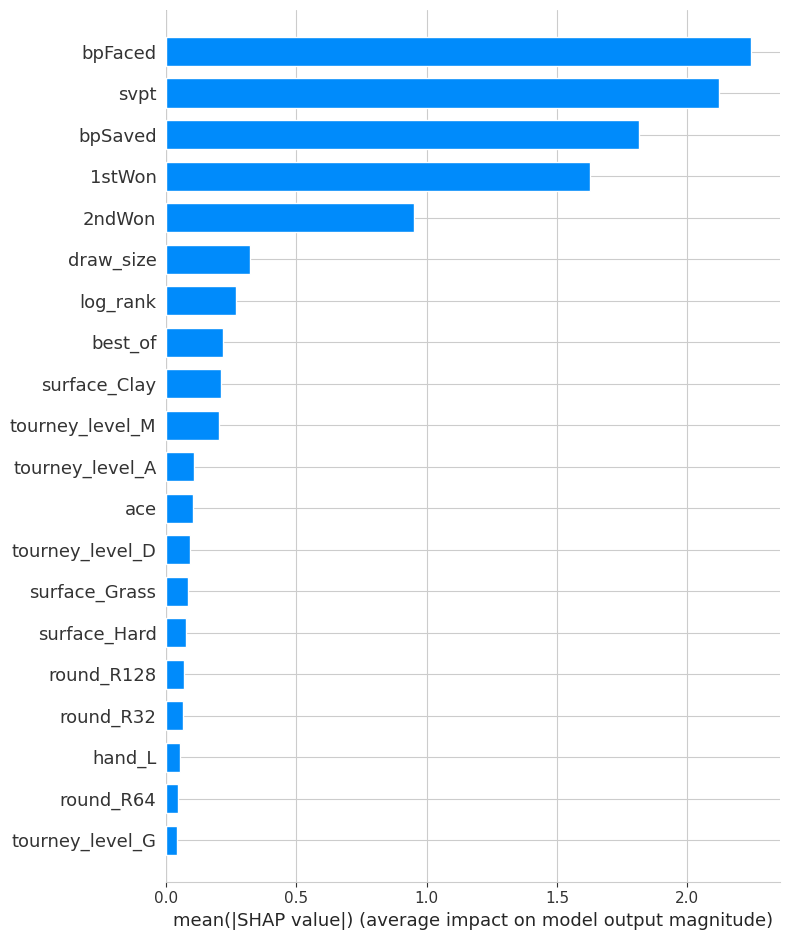

In [79]:
shap.summary_plot(
    shap_values, plot_type='bar',
    feature_names=X_test_enc.columns,
)

The categorical variables of the dataset actually seem to have little impact on the model output, which comes in contrast with our previous analysis.

**<u>Question 12</u>**: <br>
**Use the same shap plot as previously but replace `plot_type="bar"` with `plot_type="dot"`.** <br>
**And add the data you used to compute shap_values in `features=...`.**

**Explain what you have understood about this plot**:
- **Which variables are important in terms of explainability ?**
- **How does the values of the important variables affect predictions ?**

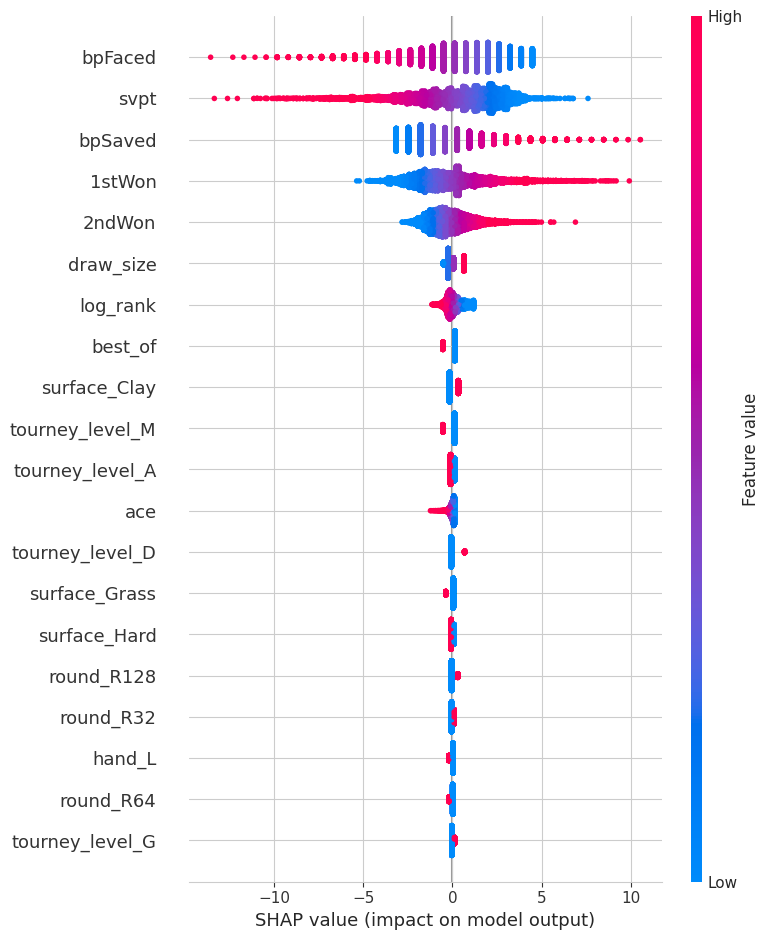

In [80]:
shap.summary_plot(
    shap_values, plot_type='dot',
    feature_names=X_test_enc.columns,
    features=X_test_enc,
)

Let's compare with the correlation values we computed in the beginning:

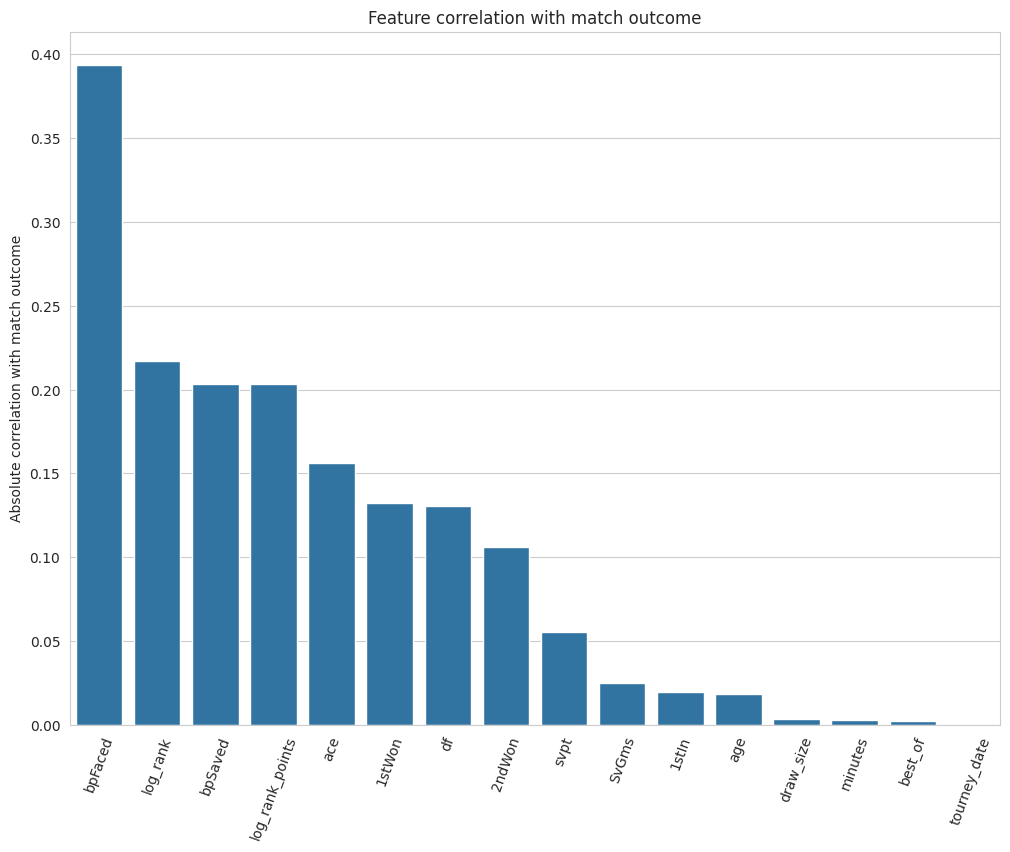

In [81]:
plt.figure(figsize=(12, 9))
sns.barplot(corr_matrix['won'].drop(index=['won']).abs().sort_values(ascending=False))
plt.xticks(rotation=70)
plt.ylabel('Absolute correlation with match outcome')
plt.title('Feature correlation with match outcome');

**Key takeaways:**

- Variables that are highly correlated with the target variable explain the model the most
- Some variables with somewhat low correlation still have a high explainability score
- Some correlated variables can have both positive and negative contribution

## **4. Deep Learning (Bonus)**

We will start by importing one of Python's Deep Learning libraries `tensorflow`/`keras`.

In [82]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

2024-08-23 12:04:07.094420: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In the following cells, `dataset` should be the dataset you transformed with data pre-processing (Onehotencoded, LabelEncoder,...). <br>
You should run the following cells to prepare the data to train a Deep Learning model.

**Question 14 (Bonus)** <br>
**Make a small neural network model using `tensorflow`/`keras`, and print the accuracy**

*Note: You can use the following elements to train the neural network* <br>
- *`tf.keras.Sequential`*
- *`layers.Dense(INTEGER, activation='relu')`*,
- *`tf.keras.losses.BinaryCrossentropy`*
- *`model.compile(optimizer='adam', ...)`*
- *`model.fit`*
- *`model.evaluate`* with epoch ~= 10

In [83]:
import tensorflow as tf
import keras
from keras import Input, Sequential
from keras.layers import Dense

In [84]:
model = keras.Sequential()
model.add(keras.Input(shape=(X_train_enc.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

In [85]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])#, 'f1_score'])
model.fit(X_train_enc.values, y_train.values, epochs=10)#, validation_data=(X_test_enc, y_test))
[binary_crossentropy, accuracy] = model.evaluate(X_test_enc.values, y_test.values)
print(f'Deep learning model accuracy on test dataset: {accuracy:.4f}')

Epoch 1/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5692 - loss: 0.6903
Epoch 2/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7232 - loss: 0.5716
Epoch 3/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7469 - loss: 0.5426
Epoch 4/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7643 - loss: 0.5171
Epoch 5/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7746 - loss: 0.5014
Epoch 6/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7759 - loss: 0.4938
Epoch 7/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7876 - loss: 0.4792
Epoch 8/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7915 - loss: 0.4751
Epoch 9/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7974 - loss: 0.4642
Epoch 10/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7975 - loss: 0.4626
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8013 - loss: 0.4585
Deep learning model accuracy on test dataset: 0.8005


So far, this is no better than the simple logistic regression. Let's make the model actually *deep*.

In [86]:
model = keras.Sequential()
model.add(keras.Input(shape=(X_train_enc.shape[1],)))
# This is just an heuristic based on the PCA we did before.
# This can be improved through hyperparameter tuning
model.add(Dense(n_components, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [87]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])#, 'f1_score'])
model.fit(X_train_enc.values, y_train.values, epochs=10)#, validation_data=(X_test_enc, y_test))
[binary_crossentropy, accuracy] = model.evaluate(X_test_enc.values, y_test.values)
print(f'Deep learning model accuracy on test dataset: {accuracy:.4f}')

Epoch 1/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6834 - loss: 0.5941
Epoch 2/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7801 - loss: 0.4554
Epoch 3/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7989 - loss: 0.4153
Epoch 4/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8023 - loss: 0.4012
Epoch 5/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7965 - loss: 0.4033
Epoch 6/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8052 - loss: 0.3924
Epoch 7/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8062 - loss: 0.3935
Epoch 8/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8029 - loss: 0.3983
Epoch 9/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7984 - loss: 0.3965
Epoch 10/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8063 - loss: 0.3889
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8100 - loss: 0.3976
Deep learning model accuracy on test dataset: 0.8096


Adding a larger dense layer improved the loss, but it still does not outperform the simple logistic regression classifier.

## Technical conclusion and key takeaways

- **The simple logistic regression classifier is enough**. It is at least on par, or even outperforms all the other models.
- Overall, a lot of variables (the categorical features in particular) aren't needed for good prediction results.
- **The match results are still quite unpredictable**. There seems to be a limit to the prediction accuracy models can get, because we do not have access to the opponent statistics. Otherwise the models could draw conclusions from the variables with higher confidence.